---

# Lecture 8.2 Ensemble Boosting 

## Introduction
Training a bunch of individual models in a sequential way. Each individual model learns from mistakes made by the previous model.

<p align="center">
    <img src="ensemble3.png" width="900">
</p>


Boosting involves incrementally building an ensemble by training each new model instance to emphasize the training instances that previous models mis-classified. In some cases, boosting has been shown to yield better accuracy than bagging, but it also tends to be more likely to over-fit the training data. By far, the most common implementation of boosting is Adaboost, although some newer algorithms are reported to achieve better results.

In Boosting, an equal weight (uniform probability distribution) is given to the sample training data (say D1) at the very starting round. This data (D1) is then given to a base learner (say L1). The mis-classified instances by L1 are assigned a weight higher than the correctly classified instances, but keeping in mind that the total probability distribution will be equal to 1. This boosted data (say D2) is then given to second base learner (say L2) and so on. The results are then combined in the form of voting.

## AdaBoost (Adaptive Boosting)

AdaBoost is a boosting ensemble model and works especially well with the decision tree. Boosting model’s key is learning from the previous mistakes, e.g. misclassification data points. AdaBoost learns from the mistakes by increasing the weight of misclassified data points.

<p align="center">
    <img src="ensemble5.png" width="800">
</p>

- Step 0: Initialize the weights of data points. if the training set has 100 data points, then each point’s initial weight should be 1/100 = 0.01.
* Step 1: Train a decision tree
* Step 2: Calculate the weighted error rate (e) of the decision tree. The weighted error rate (e) is just how many wrong predictions out of total and you treat the wrong predictions differently based on its data point’s weight. The higher the weight, the more the corresponding error will be weighted during the calculation of the (e).
* Step 3: Calculate this decision tree’s weight in the ensemble
  the weight of this tree = learning rate * log( (1 — e) / e)
  - the higher weighted error rate of a tree, 😫, the less decision power the tree will be given during the later voting
  * the lower weighted error rate of a tree, 😃, the higher decision power the tree will be given during the later voting
* Step 4: Update weights of wrongly classified points
  the weight of each data point =
  - if the model got this data point correct, the weight stays the same
  * if the model got this data point wrong, the new weight of this point = old weight * np.exp(weight of this tree)
* Step 5: Repeat Step 1(until the number of trees we set to train is reached)
* Step 6: Make the final prediction
  The AdaBoost makes a new prediction by adding up the weight (of each tree) multiply the prediction (of each tree). Obviously, the tree with higher weight will have more power of influence the final decision.

<p align="center">
    <img src="ensemble6.png" width="900">
</p>

---

---
## Dataset and Application 1-AdaBoost

We will use the *penguins* dataset loaded from *seaborn* to demonstrate this new technique. 
The Introduction of *penguins* dataset is described in README.md

---

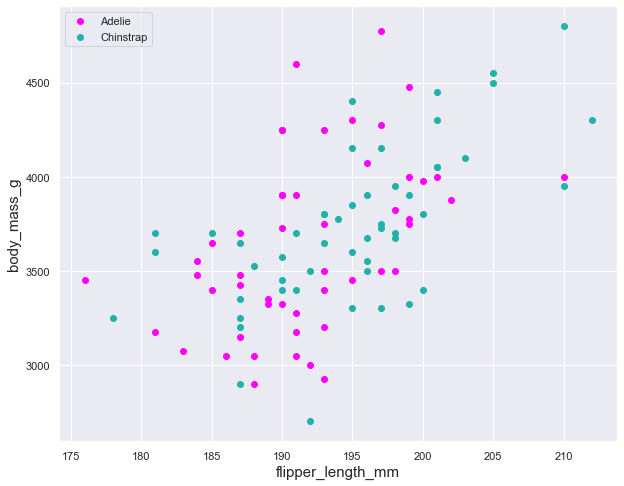

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

#import the data
df = sns.load_dataset("penguins").dropna()
df= df.iloc[96:197]
#df


X = df[["flipper_length_mm", "body_mass_g"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Adelie":
        return 0
    else:
        return 1
         
# Create target value array
y = df["species"].map(make_labels).to_numpy()

# Plot the data
penguins = ["Adelie", "Chinstrap"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.flipper_length_mm,
               temp_df.body_mass_g,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("flipper_length_mm", fontsize = 15)
ax.set_ylabel("body_mass_g", fontsize = 15)
ax.legend()
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.65      0.57      0.60        23
           1       0.52      0.61      0.56        18

    accuracy                           0.59        41
   macro avg       0.59      0.59      0.58        41
weighted avg       0.59      0.59      0.59        41
 



The accuracy is 0.59, not very good. We next visualize the AdaBoost clf.

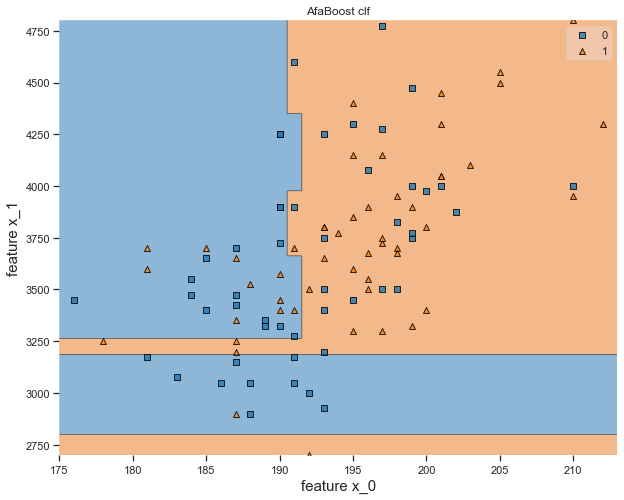

In [3]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = ada_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.title("AdaBoost clf")
plt.grid()
plt.show()

We are going to include more features to improve the performance.

In [3]:
X = df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")


Tree Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.94      0.94      0.94        18

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41
 



Including more features results in a much higher accuracy score 0.95

---

## Gradient Boosting 

Gradient boosting is another boosting model. Boosting model’s key is learning from the previous mistakes. Gradient Boosting learns from the mistake — residual error directly, rather than update the weights of data points.
<p align="center">
    <img src="ensemble7.png" width="800">
</p>

- Step 1: Train a decision tree
* Step 2: Apply the decision tree just trained to predict
* Step 3: Calculate the residual of this decision tree, Save residual errors as the new y
* Step 4: Repeat Step 1 (until the number of trees we set to train is reached)
* Step 5: Make the final prediction
  The Gradient Boosting makes a new prediction by simply adding up the predictions (of all trees).

<p align="center">
    <img src="ensemble8.png" width="900">
</p>

---

---
## Dataset and Application 2-Gradient Boosting-1

We will use the *wine*(Red Wine Quality) dataset loaded from kaggle.com to demonstrate this new technique. 
The Introduction of *wines* dataset is described in README.md

---

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

wine = pd.read_csv("/Users/rachelan/Rice University/Rice-INDE-577/Rice-INDE-577/Supervised Learning/Ensemble Learning/winequality-red.csv")
wine[0:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [26]:
wine.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
X=wine.drop(["quality"],axis=1)
y=wine[["quality"]]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)


In [29]:
# with new parameters
gb = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
# with default parameters
gb = GradientBoostingRegressor()
print(gb)

GradientBoostingRegressor()


In [30]:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

GradientBoostingRegressor()

In [31]:
gb.fit(X_train, y_train)

/Users/rachelan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor()

In [32]:
y_pred = gb.predict(X_test)
MSE = mean_squared_error(y_test,y_pred)
 
print("MSE: %.2f" % MSE)

MSE: 0.36


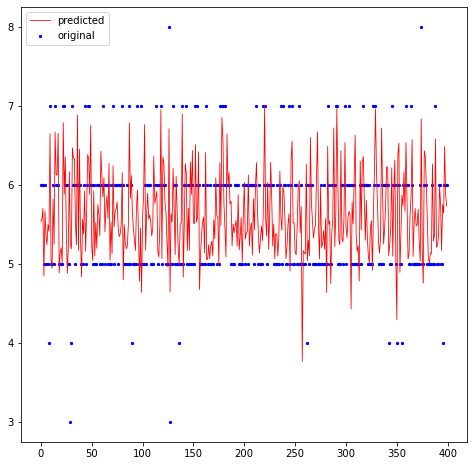

In [33]:


x_ax = range(len(y_test))
plt.figure(figsize=(8, 8))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

---
## Dataset and Application 2-Gradient Boosting-2

We will use random generated numberical data to demonstrate this new technique. 

---

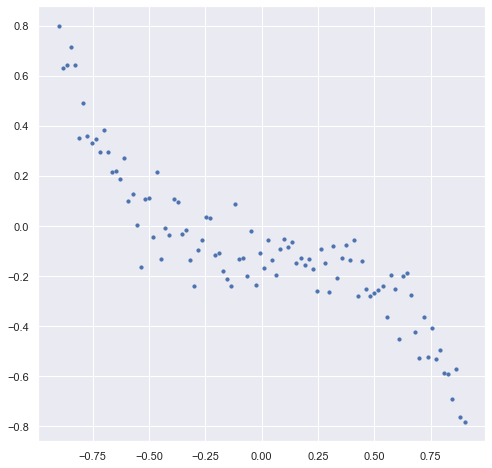

In [4]:
np.random.seed(0)
X = np.linspace(-.9, .9, 100)
y = -(X ** 3) + np.random.normal(-.09, .09, 100)
plt.figure(figsize=(8, 8))
plt.scatter(X, y, s=10)
plt.show()

In [5]:
from sklearn.tree import DecisionTreeRegressor

X_new = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_new, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)





tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_train, y_train)

y2 = y_train - tree_reg1.predict(X_train)

tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X_train, y2)

y3 = y2 - tree_reg2.predict(X_train)

tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

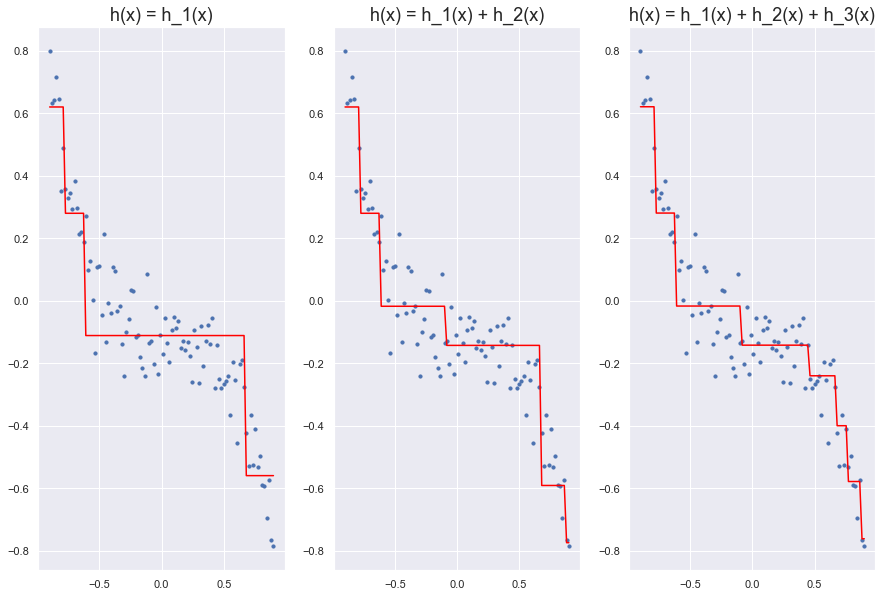

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.scatter(X, y, s=10)
ax1.plot(X, tree_reg1.predict(X_new), color = "red")
ax1.set_title("h(x) = h_1(x)", fontsize = 18)

ax2.scatter(X, y, s=10)
ax2.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new), color = "red")
ax2.set_title("h(x) = h_1(x) + h_2(x)", fontsize = 18)

ax3.scatter(X, y, s=10)
ax3.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new)+tree_reg3.predict(X_new), color = "red")
ax3.set_title("h(x) = h_1(x) + h_2(x) + h_3(x)", fontsize = 18)
plt.show()

---
We can see that when adding up the prediction, the line is more fitted to the data.

---

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth = 2, n_estimators = 150, learning_rate=0.05, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_new)

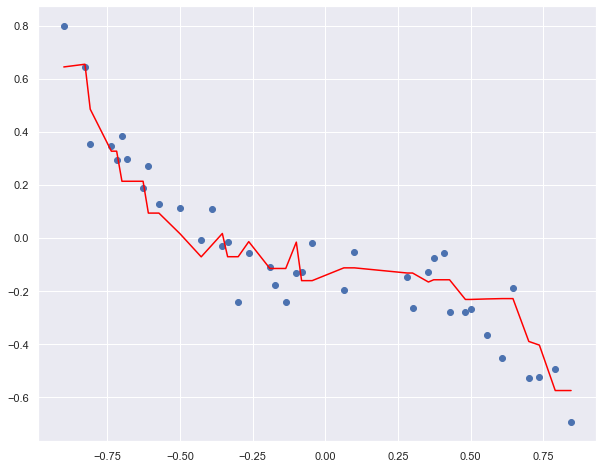

In [9]:

y_pred = gb_reg.predict(X_test)
points = [(x[0], y, z) for x, y, z in zip(X_test, y_pred, y_test)]
points.sort(key = lambda x : x[0])
X_new_test, y_new_pred, y_new_test = np.array([x[0] for x in points]), np.array([x[1] for x in points]), np.array([x[2] for x in points])
X_new_test = X_new_test.reshape(-1, 1)


plt.figure(figsize=(10, 8))
plt.scatter(X_new_test, y_new_test)
plt.plot(X_new_test, y_new_pred, color = "red")
plt.show()

## Reference

Chen, L. (2019, January 2). Basic ensemble learning (random forest, AdaBoost, gradient boosting)- step by step explained. Medium. Retrieved May 7, 2022, from https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725 

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Polikar, R. (n.d.). Ensemble learning. Scholarpedia. Retrieved May 7, 2022, from http://www.scholarpedia.org/article/Ensemble_learning 

Wikimedia Foundation. (2022, January 22). Ensemble learning. Wikipedia. Retrieved May 7, 2022, from https://en.wikipedia.org/wiki/Ensemble_learning 